In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_polyfit_strategy import (
    TSMyoPolyfitStrategy,
)
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPolyfitStrategy, {})

2020-02-13 23:43:05.754488	开始加载历史数据
2020-02-13 23:43:06.057026	加载进度： [8%]
2020-02-13 23:43:06.299099	加载进度：# [16%]
2020-02-13 23:43:06.605536	加载进度：## [25%]
2020-02-13 23:43:06.882083	加载进度：### [33%]
2020-02-13 23:43:07.212854	加载进度：#### [41%]
2020-02-13 23:43:07.478169	加载进度：#### [49%]
2020-02-13 23:43:07.756935	加载进度：##### [58%]
2020-02-13 23:43:08.115471	加载进度：###### [66%]
2020-02-13 23:43:08.409848	加载进度：####### [74%]
2020-02-13 23:43:08.610261	加载进度：######## [82%]
2020-02-13 23:43:08.992760	加载进度：######### [90%]
2020-02-13 23:43:09.184811	加载进度：######### [99%]
2020-02-13 23:43:09.185812	加载进度：########## [100%]
2020-02-13 23:43:09.185812	历史数据加载完成，数据量：55680
2020-02-13 23:43:09.384494	策略初始化完成
2020-02-13 23:43:09.385496	开始回放历史数据
2020-02-13 23:43:13.339912	历史数据回放结束
2020-02-13 23:43:13.340913	开始计算逐日盯市盈亏
2020-02-13 23:43:13.348921	逐日盯市盈亏计算完成
2020-02-13 23:43:13.348921	开始计算策略统计指标
2020-02-13 23:43:13.388950	------------------------------
2020-02-13 23:43:13.388950	首个交易日：	2019-01-16
2020-02-13 23:43:13

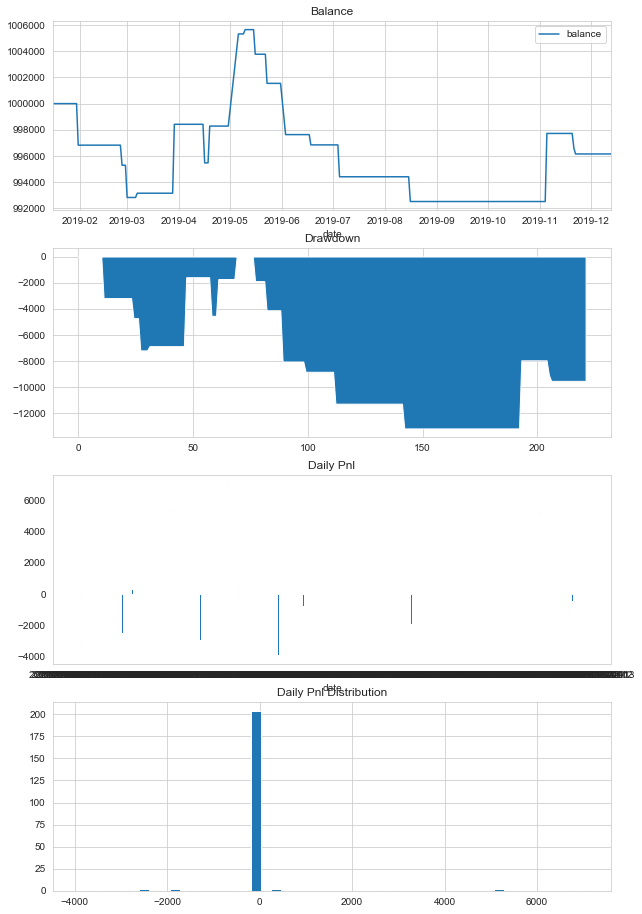

In [3]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [9]:
# 开盘75min开始拟合 窗口5min ， 3min bar
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("poly_entry_1", 0, 0.4, 0.1)
setting.add_parameter("poly_entry_2", 0, 0.04, 0.01)
setting.add_parameter("poly_out_1", 0, 0.1, 0.05)
#setting.add_parameter("setup_fit", 75, 105, 15)
setting.add_parameter("end_window", 80, 110, 15)
setting.add_parameter("fit_bar", 3, 4, 1)

engine.run_optimization(setting)

2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80, 'fit_bar': 4}, 目标：-0.24749778437348235
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0.05, 'end_window': 80, 'fit_bar': 4}, 目标：-0.24749778437348235
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0.1, 'end_window': 80, 'fit_bar': 4}, 目标：-0.24749778437348235
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80, 'fit_bar': 4}, 目标：-0.3944836208009617
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0.05, 'end_window': 80, 'fit_bar': 4}, 目标：-0.3944836208009617
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0.1, 'end_window': 80, 'fit_bar': 4}, 目标：-0.3944836208009617
2020-02-14 14:27:28.294967	参数：{'poly_entry_1': 0.30000000000000004, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end

[("{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80, 'fit_bar': 4}",
  -0.24749778437348235,
  {'start_date': datetime.date(2017, 1, 17),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 477,
   'profit_days': 45,
   'loss_days': 67,
   'capital': 1000000,
   'end_balance': 994038.0754000006,
   'max_drawdown': -20397.78719999944,
   'max_ddpercent': -2.0129301632770233,
   'max_drawdown_duration': 511,
   'total_net_pnl': -5961.9245999994255,
   'daily_net_pnl': -12.49879371069062,
   'total_commission': 7341.9246,
   'daily_commission': 15.391875471698114,
   'total_slippage': 13440.0,
   'daily_slippage': 28.17610062893082,
   'total_turnover': 244730820.0,
   'daily_turnover': 513062.5157232704,
   'total_trade_count': 224,
   'daily_trade_count': 0.469601677148847,
   'total_return': -0.5961924599999446,
   'annual_return': -0.2999710490565759,
   'daily_return': -0.0010019844766534312,
   'return_std': 0.06271844737617586,
   'sharpe_ratio':

In [7]:
# 开盘75min开始拟合 窗口5min ， 4min bar
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("poly_entry_1", 0, 0.4, 0.1)
setting.add_parameter("poly_entry_2", 0, 0.04, 0.01)
setting.add_parameter("poly_out_1", 0, 0.1, 0.05)
#setting.add_parameter("setup_fit", 75, 105, 15)
setting.add_parameter("end_window", 80, 110, 15)
#setting.add_parameter("fit_bar", 3, 5, 1)

engine.run_optimization(setting)

2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80}, 目标：-0.24749778437348235
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0.05, 'end_window': 80}, 目标：-0.24749778437348235
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0.1, 'end_window': 80}, 目标：-0.24749778437348235
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80}, 目标：-0.3944836208009617
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0.05, 'end_window': 80}, 目标：-0.3944836208009617
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0.1, 'end_window': 80}, 目标：-0.3944836208009617
2020-02-14 13:59:55.447533	参数：{'poly_entry_1': 0.30000000000000004, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80}, 目标：-0.5755128411672168
2020-02-14 13:59:55.447533	参数：{'poly_entry_1':

[("{'poly_entry_1': 0, 'poly_entry_2': 0.04, 'poly_out_1': 0, 'end_window': 80}",
  -0.24749778437348235,
  {'start_date': datetime.date(2017, 1, 17),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 477,
   'profit_days': 45,
   'loss_days': 67,
   'capital': 1000000,
   'end_balance': 994038.0754000006,
   'max_drawdown': -20397.78719999944,
   'max_ddpercent': -2.0129301632770233,
   'max_drawdown_duration': 511,
   'total_net_pnl': -5961.9245999994255,
   'daily_net_pnl': -12.49879371069062,
   'total_commission': 7341.9246,
   'daily_commission': 15.391875471698114,
   'total_slippage': 13440.0,
   'daily_slippage': 28.17610062893082,
   'total_turnover': 244730820.0,
   'daily_turnover': 513062.5157232704,
   'total_trade_count': 224,
   'daily_trade_count': 0.469601677148847,
   'total_return': -0.5961924599999446,
   'annual_return': -0.2999710490565759,
   'daily_return': -0.0010019844766534312,
   'return_std': 0.06271844737617586,
   'sharpe_ratio': -0.2474977843

2020-02-14 13:44:12.353942	开始加载历史数据
2020-02-14 13:44:12.630793	加载进度： [8%]
2020-02-14 13:44:12.843893	加载进度：# [16%]
2020-02-14 13:44:13.145905	加载进度：## [25%]
2020-02-14 13:44:13.407793	加载进度：### [33%]
2020-02-14 13:44:13.695075	加载进度：#### [41%]
2020-02-14 13:44:13.960348	加载进度：#### [49%]
2020-02-14 13:44:14.225503	加载进度：##### [58%]
2020-02-14 13:44:14.572489	加载进度：###### [66%]
2020-02-14 13:44:14.832163	加载进度：####### [74%]
2020-02-14 13:44:15.039158	加载进度：######## [82%]
2020-02-14 13:44:15.399957	加载进度：######### [90%]
2020-02-14 13:44:15.557287	加载进度：######### [99%]
2020-02-14 13:44:15.557287	加载进度：########## [100%]
2020-02-14 13:44:15.557287	历史数据加载完成，数据量：55680
2020-02-14 13:44:15.663330	策略初始化完成
2020-02-14 13:44:15.663330	开始回放历史数据
2020-02-14 13:44:18.198693	历史数据回放结束
2020-02-14 13:44:18.198693	开始计算逐日盯市盈亏
2020-02-14 13:44:18.198693	逐日盯市盈亏计算完成
2020-02-14 13:44:18.198693	开始计算策略统计指标
2020-02-14 13:44:18.214075	------------------------------
2020-02-14 13:44:18.214075	首个交易日：	2019-01-16
2020-02-14 13:44:18

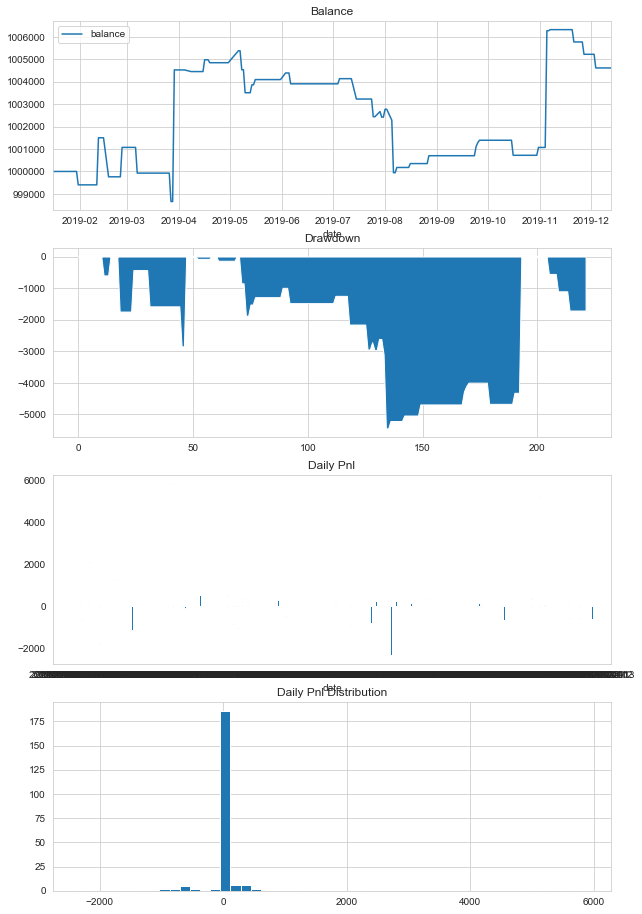

In [5]:
#%%
#%%
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoPolyfitStrategy,{'poly_entry_1': 0.4, 'poly_entry_2': 0.04, 'poly_out_1': 0})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()